In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [2]:
#Leer el archivo parquet que sale del preprocess.py
path = '/export/usuarios_ml4ds/lbartolome/NextProcurement/data/processed_10_abr/md.parquet'
df_preprocesado = pd.read_parquet(path)

In [8]:
df_preprocesado['lemmas'].iloc[0]

'actuacion desmontado cubierta placa_fibrocemento muelle estación osuna id licitación órgano contratación adif presidencia importe eur res'

In [12]:
df_preprocesado

,id_tm,raw_text,lemmas
identifier,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/0,0,Actuacion de desmontado de cubierta de placas ...,actuacion desmontado cubierta placa_fibrocemen...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/10,1,Servicio de mantenimiento de una puerta girato...,servicio mantenimiento puerta_giratoria automá...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/101,2,Servivios tecnologia GESTIONA: suscripcion man...,servivios tecnologia_gestiona suscripcion serv...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/107,3,"Suministro de equipos de sobremesa, portátiles...",suministro equipo sobremesa portátil_monitor d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/108,4,Realización de backup remoto en las oficinas d...,backup_remoto oficina_siepse id licitación órg...
...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95,3360668,servicio de punto de encuentro familiar en la ...,servicio punto encuentro_familiar provincia má...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/96/1,3360669,0001181/2023 contr 2023 1204117 servicio de ma...,contr servicio mantenimiento soporte técnico s...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/97,3360670,renting vehiculo 5 plazas para el delegado t. ...,renting vehiculo plaza delegado justicia funci...


In [5]:
num_valores_none = df_preprocesado['preprocessed_text'].isna().sum()
filas_none = df_preprocesado[df_preprocesado['preprocessed_text'].isna()]

print(num_valores_none)

41790


In [6]:
df_preprocesado = df_preprocesado[df_preprocesado['preprocessed_text'].notna()]

In [55]:
#Esto es para hacer las pruebas 
path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/processed/minors_insiders_outsiders_origen_sin_lot_info.parquet'

# Exportar el DataFrame a un archivo parquet en la ruta especificada
df = pd.read_parquet(path)

In [50]:
# Suponiendo que df es tu DataFrame y 'origen' es la columna que contiene las categorías
conteo_origen = df['origen'].value_counts()

# Imprimir los resultados
print(conteo_origen)

origen
minors       2151793
insiders      576600
outsiders     293739
Name: count, dtype: int64


In [57]:
df

,id_tm,origen,title,summary,text
identifier,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,minors,Reforma de elementos de ventilación exterior d...,Id licitación: 000103/2017-1069; Órgano de Con...,Reforma de elementos de ventilación exterior d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,minors,Servicios de calibrado y certificado de dos de...,Id licitación: 29-2017-II; Órgano de Contratac...,Servicios de calibrado y certificado de dos de...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,minors,"Patrocinio menor proyecto "" Activitats C.I.N.E""",Id licitación: 013-07-2018; Órgano de Contrata...,"Patrocinio menor proyecto "" Activitats C.I.N.E..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,minors,Redacción EPIA - Legalización antena emisora d...,Id licitación: CON/2017/51; Órgano de Contrata...,Redacción EPIA - Legalización antena emisora d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,minors,Obras de reparación del Centro de Información ...,Id licitación: 000047/2017-1069; Órgano de Con...,Obras de reparación del Centro de Información ...
...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,outsiders,concesion de servicios de peluquerías en 10 cp...,Id licitación: CONTR 2023 0000922771; Órgano d...,concesion de servicios de peluquerías en 10 cp...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,outsiders,Servicios y suministros para la seguridad inte...,Id licitación: CR050-23-087B; Órgano de contra...,Servicios y suministros para la seguridad inte...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,outsiders,Contrato de concesión de servicios para la ges...,Id licitación: CONTR 2023 0001215494; Órgano d...,Contrato de concesión de servicios para la ges...


In [53]:
len(df)

3360673

In [10]:
path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/processed/minors_insiders_outsidersolo_merge_y_lang_id.parquet'
df = pd.read_parquet(path)

In [51]:
df

,id_tm,origen,title,summary,lot_name,text,lang
identifier,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,minors,Reforma de elementos de ventilación exterior d...,Id licitación: 000103/2017-1069; Órgano de Con...,nan,Reforma de elementos de ventilación exterior d...,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,minors,Servicios de calibrado y certificado de dos de...,Id licitación: 29-2017-II; Órgano de Contratac...,nan,Servicios de calibrado y certificado de dos de...,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,minors,"Patrocinio menor proyecto "" Activitats C.I.N.E""",Id licitación: 013-07-2018; Órgano de Contrata...,nan,"Patrocinio menor proyecto "" Activitats C.I.N.E...",es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,minors,Redacción EPIA - Legalización antena emisora d...,Id licitación: CON/2017/51; Órgano de Contrata...,nan,Redacción EPIA - Legalización antena emisora d...,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,minors,Obras de reparación del Centro de Información ...,Id licitación: 000047/2017-1069; Órgano de Con...,nan,Obras de reparación del Centro de Información ...,es
...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4/9,3360668,None,concesion de servicios de peluquerías en 10 cp...,Id licitación: CONTR 2023 0000922771; Órgano d...,lote 9 peluquería cpa plaza de los campos,concesion de servicios de peluquerías en 10 cp...,es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3360669,outsiders,Servicios y suministros para la seguridad inte...,Id licitación: CR050-23-087B; Órgano de contra...,nan,Servicios y suministros para la seguridad inte...,es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3360670,outsiders,Contrato de concesión de servicios para la ges...,Id licitación: CONTR 2023 0001215494; Órgano d...,nan,Contrato de concesión de servicios para la ges...,es


# Cargando modelo tópicos

In [4]:
# Cargar descripciones de tópicos, es la salida del modelo LDA
tpc_descriptions_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_descriptions.txt"
tpc_descriptions = pd.read_csv(tpc_descriptions_path, header=None, names=['description'])

# Cargar etiquetas de tópicos
#tpc_labels_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_labels.txt"
#tpc_labels = pd.read_csv(tpc_labels_path, header=None, names=['label'])

# Cargar embeddings de tópicos, ahora mismo no son necesarias
#tpc_embeddings_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_embeddings.npy"
#tpc_embeddings = np.load(tpc_embeddings_path, allow_pickle=True)

In [5]:
tpc_descriptions

,,,,,,,,,,,,,,description
provincial,diputación,consejería,junta,insular,curso,publicidad,penitenciario,escolar,campaña,bienestar,parador,comunidades,cabildo,promoción
universidad,rectorado,aeropuerto,agencia,licencia,software,investigación,instituto,fundación,estatal,soporte,tecnológico,informático,dato,renfe-fabricación
obra,calle,proyecto,mejora,redacción,junta,ejecución,pavimentación,diputación,provincial,municipal,local,acondicionamiento,reforma,pfea
municipal,local,civil,junta,autoridad,residuo,portuaria,policía,de-seguro,administración,consejo,extinción,póliza,correos,salvamento
seguridad-social,colaboradoro,jefatura,fremap,sección,director,mutua,servicio-sanitario,medicamento,ctro,asunto,gerente,intendencia,económicos,salud


In [6]:
#tpc_embeddings.shape

# Cargando el corpus

In [7]:
# Cargar el corpus
corpus_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/train_data/corpus.txt"
corpus_df = pd.read_csv(corpus_path, header=None, names=['description'], index_col=False)

In [8]:
corpus_df

,description
0,0\t0\themocomponentes producto farmaceuticos e...
1,1\t0\ttps tongue aparato evaluar tratar presió...
2,4\t0\tcreación espacio aparcamiento durar obra...
3,10\t0\tadorno caseta municipal mayo baños encina
4,12\t0\tab-menor simplificado-rendimiento-trans...
...,...
26388,35340\t0\tsuministro accesorio latón tubería p...
26389,35341\t0\tcdn caché compañía representación ob...
26390,35342\t0\tservicio mantenimiento aplicación in...
26391,35343\t0\tcontrato derivado acuerdo-marco sumi...


In [9]:
def quitar_prefijo(texto):
    
    patron = r'^\d+\t\d+\t'
    texto_modificado = re.sub(patron, '', texto)
    
    return texto_modificado

In [10]:
corpus_df['description'] = corpus_df['description'].apply(quitar_prefijo)

In [11]:
pd.set_option('max_colwidth', None)

In [12]:
corpus_df

,description
0,hemocomponentes producto farmaceuticos especialidad farmaceuticas vario productes farmacèutics especialitat farmacèutiques departamento salud dirección económica-gerencia
1,tps tongue aparato evaluar tratar presión resistencia ling rectorado universidad
2,creación espacio aparcamiento durar obra acondicionamiento plaza centro espeleología montaña
3,adorno caseta municipal mayo baños encina
4,ab-menor simplificado-rendimiento-transporte-deportivo liga provincial dirección provincial consejería
...,...
26388,suministro accesorio latón tubería polietileno ejecución obra conservación mantenimiento abastecimiento agua-potable gestionar agua córdoba-emp cc consejo administración provincial aguas
26389,cdn caché compañía representación obra chien et loup teatro guerrero dirección general instituto nacional artes-escénicas música
26390,servicio mantenimiento aplicación informático gestión patrimonial gpa periodo concejalía delegado gestión económico presupuestario organización régimen-interior
26391,contrato derivado acuerdo-marco suministro mezcla bituminós obra gerencia provincial grupo agrario adj


In [13]:
def generar_dataframe_desde_txt(vocab_path):
    # Inicializar listas para almacenar los componentes separados
    palabras = []
    freqs = []

    # Abrir el archivo para lectura
    with open(vocab_path, 'r', encoding='utf-8') as archivo:
        # Iterar sobre cada línea del archivo
        for linea in archivo:
            # Dividir la línea por el tabulador
            partes = linea.strip().split('\t')
            # Asegurar que la línea tiene exactamente dos partes
            if len(partes) == 2:
                palabra, freq = partes
                palabras.append(palabra)
                freqs.append(int(freq)) 

    # Crear un df con las listas de palabras y frecuencias
    df = pd.DataFrame({
        'palabra': palabras,
        'freq': freqs
    })

    return df

In [14]:
vocab_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/vocab_freq.txt"
df = generar_dataframe_desde_txt(vocab_path)
df_ordenado = df.sort_values(by='freq', ascending=False).reset_index(drop=True)

In [15]:
vocab = pd.read_csv(vocab_path, header=None,index_col=False)

In [16]:
#df_ordenado.to_csv('palabras_con_freq.csv',index = False)

In [9]:
def get_filtered_words(text, threshold):
    # Inicializar el vectorizador TF-IDF sin un vocabulario específico
    vectorizer = TfidfVectorizer()    
    # Ajustar el vectorizador al texto para calcular valores IDF
    vectorizer.fit(text)
    # Obtener los nombres de las características (palabras) y sus valores IDF
    feature_names = vectorizer.get_feature_names_out()
    idf_values = vectorizer.idf_

    # Filtrar palabras de baja importancia: comunes en el corpus (IDF menor o igual al umbral)
    low_importance_words = [word for word, idf in zip(feature_names, idf_values) if idf < threshold]
    # Filtrar palabras de alta importancia: raras en el corpus (IDF mayor al umbral)
    high_importance_words = [word for word, idf in zip(feature_names, idf_values) if idf >= threshold]

    # Contar el número de palabras en cada subconjunto
    num_low_importance_words = len(low_importance_words)
    num_high_importance_words = len(high_importance_words)

    # Imprimir resultados
    print(f"Palabras comunes en el corpus (total: {num_low_importance_words}):\n", low_importance_words)
    print(f"Palabras raras en el corpus (total: {num_high_importance_words}):\n", high_importance_words)

    # Retornar los subconjuntos de palabras y sus conteos
    return low_importance_words, high_importance_words, num_low_importance_words, num_high_importance_words

In [10]:
#Sirve para analizar el idf de las palabras
def get_idf_values(text):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    feature_names = vectorizer.get_feature_names_out()
    idf_values = vectorizer.idf_
    return feature_names, idf_values

#Sirve para sacar que palabras son las más repetidas
def get_tf_values(text):
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(text)
    total_word_counts = word_counts.sum(axis=0)
    # Obtener los nombres de las palabras
    feature_names = vectorizer.get_feature_names_out()
    
    # Convertir las frecuencias de término a un array de numpy
    tf_values = total_word_counts.A1
 
    # Ordenar las palabras por frecuencia de término
    sorted_tf_indices = np.argsort(tf_values)[::-1]
    sorted_words = feature_names[sorted_tf_indices]
    sorted_tf_values = tf_values[sorted_tf_indices]
    
    # Crear listas de las palabras y sus frecuencias ordenadas
    sorted_word_frequency = [(word, freq) for word, freq in zip(sorted_words, sorted_tf_values)]
    
    # Retornar la lista de palabras y frecuencias ordenadas
    return sorted_word_frequency

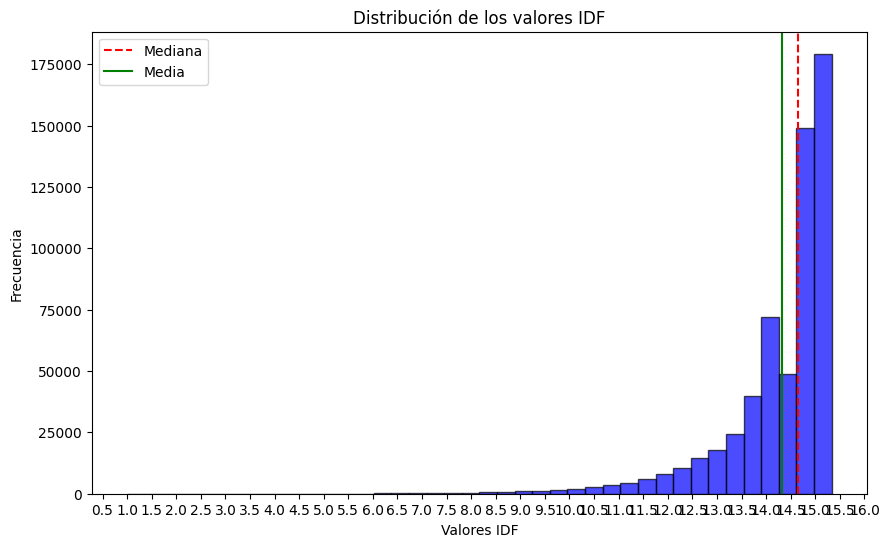

In [11]:
#Graficando los valores de idf para escoger el threshold
text = df_preprocesado['lemmas']
feature_names, idf_values = get_idf_values(text)

# Distribución de los valores IDF
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores IDF')
plt.xlabel('Valores IDF')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))  
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  
plt.axvline(x=np.median(idf_values), color='red', linestyle='--', label='Mediana')
plt.axvline(x=np.mean(idf_values), color='green', linestyle='-', label='Media')
plt.legend()
plt.show()

In [13]:
sorted_word_frequency = get_tf_values(text)
for word, freq in sorted_word_frequency[:100]:  
    print(f"{word}: {freq}")

contratación: 3566882
licitación: 3363369
id: 3348524
importe: 3339427
órgano: 3322411
eur: 3112284
res: 2844655
ayuntamiento: 1156344
servicio: 811980
suministro: 668248
alcaldía: 639797
dirección: 447753
presidencia: 402225
junta: 389227
provincial: 372123
gobierno: 308549
general: 284329
contrato: 279302
consejería: 275849
material: 274178
mantenimiento: 237998
diputación: 231806
obra: 226670
centro: 224174
municipal: 210571
gerencia: 208970
rectorado_universidad: 200947
adquisición: 199499
instalación: 195636
adj: 178213
lote: 168116
menor: 156043
murcia: 150811
reparación: 147375
salud: 146390
seguridad: 141977
social: 133361
local: 124799
gestión: 121299
educación: 99785
resuelta: 99347
proyecto: 95588
sistema: 95251
instituto: 91279
castilla_león: 89178
equipo: 88022
edificio: 87372
público: 81747
alcaldia: 79576
albacete: 78254
cultura: 77637
área: 77298
nº: 75211
limpieza: 75000
salamanca: 72966
delegación: 71609
ejecución: 71199
vehículo: 70708
servicios: 66359
programa: 6526

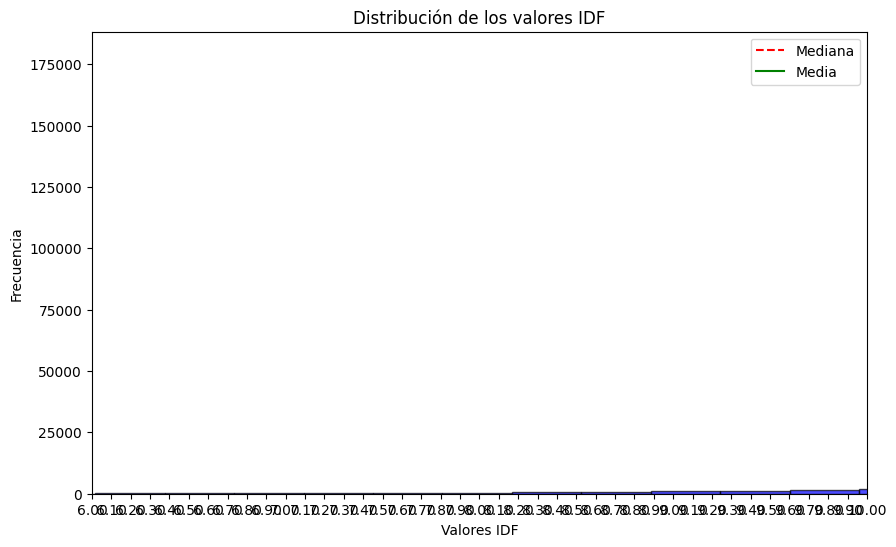

In [15]:
# Distribución de los valores IDF
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores IDF')
plt.xlabel('Valores IDF')
plt.ylabel('Frecuencia')

# Ajustar las marcas y el formato del eje X para el zoom
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))  # intervalos más finos en el eje X
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))  # dos decimales de precisión

# Ajusta los límites del eje X para hacer zoom en los valores mayores que 8.0
plt.xlim(6, 10)
# Líneas de la mediana y la media
plt.axvline(x=np.median(idf_values), color='red', linestyle='--', label='Mediana')
plt.axvline(x=np.mean(idf_values), color='green', linestyle='-', label='Media')
plt.legend()
plt.show()

In [34]:
text = df_preprocesado['lemmas']  
threshold = 7.5  
low_importance, high_importance, num_low, num_high = get_filtered_words(text, threshold)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
df_preprocesado['lemmas'].iloc[200030]

'suministro pinturas_nieto peezrd octubre id licitación órgano contratación alcaldía ayuntamiento hellín importe eur res'

In [36]:
print(len(high_importance))
print(len(low_importance))

588816
884


In [37]:
low_importance

['abastecimiento',
 'abierto',
 'abril',
 'accesibilidad',
 'acceso',
 'accesorio',
 'accidentes_trabajo',
 'acción',
 'acción_formativo',
 'acondicionamiento',
 'actividad',
 'acto',
 'actuación',
 'actuación_musical',
 'actualización',
 'adaptación',
 'adecuación',
 'adif',
 'adj',
 'adjudicación',
 'adjudicada',
 'administración',
 'administrativo',
 'adquisicion',
 'adquisición',
 'adscrito',
 'aena',
 'aeropuerto',
 'agencia',
 'agencia_estatal',
 'agencia_tributaria',
 'agosto',
 'agraria_tragsa',
 'agrario',
 'agricultura',
 'agricultura_ganadería',
 'agua',
 'agua_potable',
 'aguas',
 'aire',
 'aire_acondicionado',
 'així_com',
 'ajuntament',
 'albacete',
 'alcalde',
 'alcaldia',
 'alcaldía',
 'alcobendas',
 'alicante',
 'alimentación',
 'alimentario_imida',
 'almacenamiento',
 'almacén',
 'almansa',
 'almería',
 'alojamiento',
 'alquiler',
 'alquiler_maquinaria',
 'alto',
 'alumbrado',
 'alumbrado_público',
 'alumno',
 'alzira',
 'am',
 'amb',
 'ambiental',
 'ambiente',
 'ampl

In [38]:
# Ruta al archivo de stopwords manual, añadir 
stopwords_file_path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords/manual_stops.txt'

# Escribir las palabras de baja importancia al archivo de stopwords, añadiendo nuevas líneas
with open(stopwords_file_path, 'a') as file:
    for word in low_importance:
        file.write(word + '\n')

In [39]:
'''
# Ruta al archivo de stopwords
stopwords_file_path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords/manual_stops.txt'

# Leer las stopwords existentes y eliminar duplicados
with open(stopwords_file_path, 'r') as file:
    stopwords = set(file.read().splitlines())

# Ordenar las stopwords alfabéticamente
sorted_stopwords = sorted(stopwords)

# Escribir las palabras de baja importancia al archivo de stopwords
with open(stopwords_file_path, 'w') as file:  # Usar 'w' para escribir, sobrescribiendo el archivo existente
    for word in sorted_stopwords:
        file.write(word + '\n')
'''

In [41]:
import os

# Ruta donde se encuentran los archivos de stopwords
ruta_stopwords = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords'

# Cargar todas las stopwords desde los archivos
stopwords = set()
for archivo in os.listdir(ruta_stopwords):
    if archivo.endswith('.txt'):
        ruta_completa = os.path.join(ruta_stopwords, archivo)
        with open(ruta_completa, 'r', encoding='utf-8') as f:
            stopwords.update(f.read().splitlines())

# Vectorizar el proceso de eliminación de stopwords
def eliminar_stopwords(fila):
    return ' '.join([palabra for palabra in fila.split() if palabra not in stopwords])

# Aplicar la función de manera vectorizada
df_preprocesado['lemmas'] = df_preprocesado['lemmas'].apply(eliminar_stopwords)

Antes de aplicar las stopwords

In [40]:
df_preprocesado['lemmas'].iloc[200030]

'suministro pinturas_nieto peezrd octubre id licitación órgano contratación alcaldía ayuntamiento hellín importe eur res'

Después de aplicar las stopwords

In [42]:
df_preprocesado['lemmas'].iloc[200030]

'pinturas_nieto peezrd'

In [43]:
df_preprocesado

,id_tm,raw_text,lemmas
identifier,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/0,0,Actuacion de desmontado de cubierta de placas ...,actuacion desmontado placa_fibrocemento osuna
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/10,1,Servicio de mantenimiento de una puerta girato...,puerta_giratoria giratoria
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/101,2,Servivios tecnologia GESTIONA: suscripcion man...,servivios tecnologia_gestiona suscripcion serv...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/107,3,"Suministro de equipos de sobremesa, portátiles...",sobremesa portátil_monitor oficina_siepse peni...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/108,4,Realización de backup remoto en las oficinas d...,backup_remoto oficina_siepse penitenciarios
...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95,3360668,servicio de punto de encuentro familiar en la ...,encuentro_familiar
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/96/1,3360669,0001181/2023 contr 2023 1204117 servicio de ma...,suite_oracle licencia_oracle olap
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/97,3360670,renting vehiculo 5 plazas para el delegado t. ...,
